# 03 – Statistical Tests & Text Exploration

This notebook:
- Runs chi-square comparisons between categories
- Explores mammal common names
- Computes word frequencies

In [1]:
import pandas as pd, numpy as np
import seaborn as sns, matplotlib.pyplot as plt

from scipy.stats import chi2_contingency

species = pd.read_csv('species_info.csv',encoding='utf-8')
species.fillna('No Intervention', inplace=True)
species['is_protected'] = species.conservation_status != 'No Intervention'

###  Chi2 comparsions from Mammals to Bird, since they have highest % protected.

In [41]:
from scipy.stats import chi2_contingency

contingency1 = [[30, 146],
              [75, 413]]
chi2_contingency(contingency1)

Chi2ContingencyResult(statistic=0.1617014831654557, pvalue=0.6875948096661336, dof=1, expected_freq=array([[ 27.8313253, 148.1686747],
       [ 77.1686747, 410.8313253]]))

### Chi2 comparsions from Mammals to Fish, since they have 2nd highest % protected.

In [42]:
contingency2 = [[30, 146],
              [11, 115]]
chi2_contingency(contingency2)

Chi2ContingencyResult(statistic=3.647651024981415, pvalue=0.0561483484489001, dof=1, expected_freq=array([[ 23.89403974, 152.10596026],
       [ 17.10596026, 108.89403974]]))

### Chi2 comparsions from Mammals to Reptiles, since they have 3rd highest % protected.

In [43]:
contingency3 = [[30, 146],
              [5, 73]]
chi2_contingency(contingency3)

Chi2ContingencyResult(statistic=4.289183096203645, pvalue=0.03835559022969898, dof=1, expected_freq=array([[ 24.2519685, 151.7480315],
       [ 10.7480315,  67.2519685]]))

### Common Name Analysis

In [51]:
common_Names = (
    species[species.category == "Mammal"]\
        .common_names\
        .str.replace(r'[^\w\s]', '', regex=True)\
        .str.split()                             
        .tolist()                                  
)
common_Names[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison', 'Bison'],
 ['Aurochs',
  'Aurochs',
  'Domestic',
  'Cattle',
  'Feral',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

### Remove duplicates

In [57]:
cleanRows = []

for item in common_Names:   
    unique_list = []
    for word in item:
        if word not in unique_list:
            unique_list.append(word)
    cleanRows.append(unique_list)
    
cleanRows[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison'],
 ['Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

### Collapsed for easier use

In [60]:
flat_list = []
for row in cleanRows:
    for word in row:
        flat_list.append(word)
flat_list[:6]

['Gappers', 'RedBacked', 'Vole', 'American', 'Bison', 'Aurochs']

### Count the number of occurrence for each unique animal > sort by count > show count table

In [62]:
word_counts = {}

for word in flat_list:
    if word in word_counts:
        word_counts[word] += 1
    else:
        word_counts[word] = 1

        
word_freq_df = pd.DataFrame(
    list(word_counts.items()),
    columns=['Word', 'Count']
).sort_values('Count', ascending=False)

word_freq_df.head(10)

,Word,Count
51,Bat,23
110,Shrew,18
57,Myotis,17
88,Mouse,16
107,Chipmunk,13
3,American,12
105,Squirrel,12
37,Eastern,11
2,Vole,11
29,Mountain,10


### Since bat came up 23 times lets dive into the category

In [63]:
species['is_bat'] = species.common_names.str.contains(r'\bBat\b', regex=True)

species.head(10)

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False
5,Mammal,Odocoileus virginianus,White-Tailed Deer,No Intervention,False,False
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",No Intervention,False,False
7,Mammal,Canis latrans,Coyote,Species of Concern,True,False
8,Mammal,Canis lupus,Gray Wolf,Endangered,True,False
9,Mammal,Canis rufus,Red Wolf,Endangered,True,False


In [64]:
species[species.is_bat]

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Intervention,False,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",No Intervention,False,True
32,Mammal,Lasiurus cinereus,Hoary Bat,No Intervention,False,True
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,True,True
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,True,True
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
40,Mammal,Nycticeius humeralis,Evening Bat,No Intervention,False,True


### Merge species.bats with observations. to create detailed DF of bats across all national parks

In [65]:
bat_observations = observations.merge(species[species.is_bat])
bat_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_bat
0,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True,True
1,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True,True
2,Lasiurus blossevillii,Yosemite National Park,123,Mammal,Western Red Bat,Species of Concern,True,True
3,Lasiurus blossevillii,Yellowstone National Park,221,Mammal,Western Red Bat,Species of Concern,True,True
4,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,No Intervention,False,True
...,...,...,...,...,...,...,...,...
139,Myotis sodalis,Yellowstone National Park,68,Mammal,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
140,Myotis leibii,Yosemite National Park,132,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
141,Myotis leibii,Bryce National Park,84,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
142,Myotis leibii,Great Smoky Mountains National Park,49,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True


### Show totals of all bat sightings across all National Parks

In [66]:
bat_observations.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,3433
1,Great Smoky Mountains National Park,2411
2,Yellowstone National Park,8362
3,Yosemite National Park,4786


### Lets see the protected vs non protected totals at each park

In [67]:
obs_by_park = bat_observations.groupby(['park_name', 'is_protected']).observations.sum().reset_index()
obs_by_park

,park_name,is_protected,observations
0,Bryce National Park,False,1596
1,Bryce National Park,True,1837
2,Great Smoky Mountains National Park,False,1299
3,Great Smoky Mountains National Park,True,1112
4,Yellowstone National Park,False,4044
5,Yellowstone National Park,True,4318
6,Yosemite National Park,False,2345
7,Yosemite National Park,True,2441


### Create bar pot to visualize parks observations

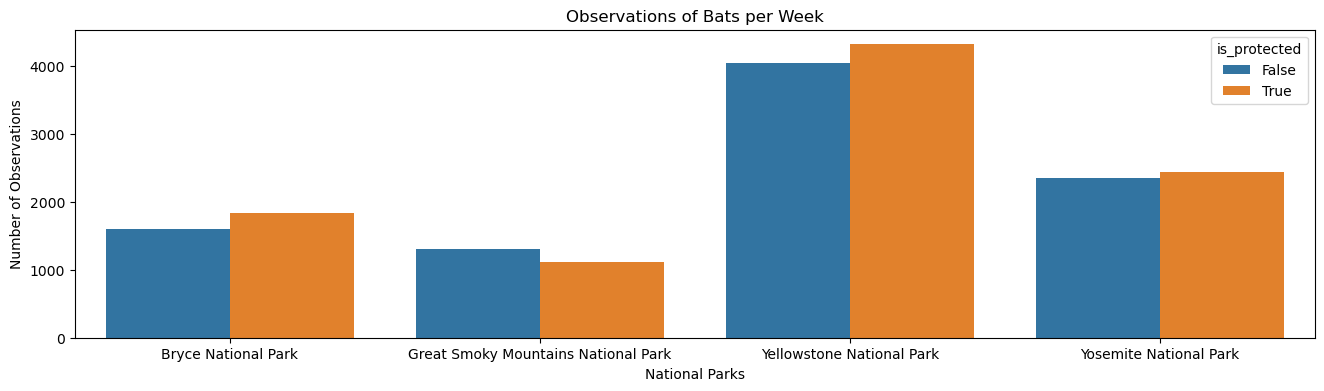

In [68]:
plt.figure(figsize=(16, 4))
sns.barplot(x=obs_by_park.park_name, y= obs_by_park.observations, hue=obs_by_park.is_protected)
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Bats per Week')
plt.show()

### Conclusion

We were able to make several inferences and data visualization about the various species in four National Parks.

### Questions Answered

##### What is the distribution of conservations status for species?

Vast majority were not apart of conservation : 5633 vs 191

##### Are certain species more likely to be endangered?

Mammals and Birds has the highest percentage of protection

##### Are the differences between species and their conservation status significant?

Mammals vs Birds did not have a significant difference but we did see a gap in conservation status in Mammals vs Reptiles

##### Which animals is protected most, what is their distribution amongst parks?

Bats have the highest conservation status with Yellowstone National Park containing the largest population